<a href="https://colab.research.google.com/github/Indian1999/csutortok_17/blob/main/Mnist_sz%C3%A1mok_felismer%C3%A9se_cs%C3%BCt%C3%B6rt%C3%B6k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train[0])
print(x_train.shape)
unique, counts = np.unique(y_train, return_counts = True)
print(unique)
print(counts)
unique, counts = np.unique(y_test, return_counts = True)
print(unique)
print(counts)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
[0 1 2 3 4 5 6 7 8 9]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


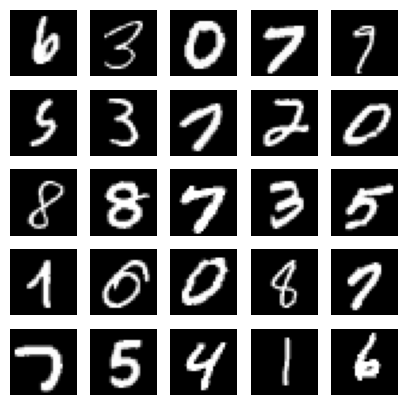

In [4]:
indeces = np.random.randint(0, len(x_train), size = 25)
images = x_train[indeces]

plt.figure(figsize = (5,5))
for i in range(len(images)):
    plt.subplot(5,5, i + 1) #(sorok száma, oszlopok száma, hanyadik  suplotra dolgozzunk?)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
plt.show()

Az adatok előkészítése

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype("float32") / 255
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype("float32") / 255

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=28*28))
model.add(Activation("relu")) # A 256 Neuron réteg a ReLU aktivációs függvényt használja
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [12]:
model.fit(x_train, y_train, epochs = 20, batch_size = 128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8607 - loss: 0.4868
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9692 - loss: 0.1016
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9810 - loss: 0.0630
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9856 - loss: 0.0436
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9897 - loss: 0.0326
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9919 - loss: 0.0245
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9934 - loss: 0.0196
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9951 - loss: 0.0169
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9950 - loss: 0.0146
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9963 - loss: 0.0108
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9968 - loss: 0.0102
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


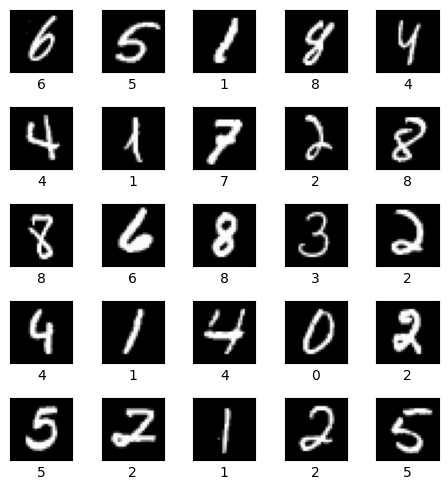

In [21]:
indeces = np.random.randint(0, len(x_test), size = 25)
images = x_test[indeces]
predictions = model.predict(images)
plt.figure(figsize = (5,5))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(images[i].reshape((28,28)), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(predictions[i]))
    plt.tight_layout()
plt.show()

In [23]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Loss: {round(loss,2)}, Accuracy: {round(acc,2)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.0973
Loss: 0.08, Accuracy: 0.98


In [25]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (3,3), input_shape = (28,28,1)))
model_conv.add(Activation("relu"))
model_conv.add(MaxPool2D((2,2)))
model_conv.add(Flatten())
model_conv.add(Dense(100))
model_conv.add(Activation("relu"))
model_conv.add(Dense(10))
model_conv.add(Activation("softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model_conv.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [27]:
model_conv.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)